In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Load Dataset

In [2]:
raw_ecommerce = pd.read_csv('dataset/Dataset.csv')

In [3]:
raw_ecommerce.columns = raw_ecommerce.columns.str.lower()

# EDA

### Descriptive Statistics

In [10]:
raw_ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12946 entries, 0 to 12945
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   administrative           12835 non-null  float64
 1   administrative_duration  12313 non-null  float64
 2   informational            12946 non-null  int64  
 3   informational_duration   12946 non-null  float64
 4   productrelated           12946 non-null  int64  
 5   productrelated_duration  12307 non-null  float64
 6   bouncerates              12872 non-null  float64
 7   exitrates                12946 non-null  float64
 8   pagevalues               12946 non-null  float64
 9   specialday               12946 non-null  float64
 10  month                    12946 non-null  object 
 11  operatingsystems         12422 non-null  float64
 12  browser                  12946 non-null  int64  
 13  region                   12946 non-null  int64  
 14  traffictype           

In [11]:
raw_ecommerce.isna().sum()

administrative             111
administrative_duration    633
informational                0
informational_duration       0
productrelated               0
productrelated_duration    639
bouncerates                 74
exitrates                    0
pagevalues                   0
specialday                   0
month                        0
operatingsystems           524
browser                      0
region                       0
traffictype                  0
visitortype                  0
weekend                      0
revenue                      0
dtype: int64

In [12]:
raw_ecommerce.duplicated().sum()

711

terdapat **12946** baris data, dengan jumlah attribut 18. Dari 18 attribut, dideteksi ada 5 attribut yang memiliki nilai kosong. dan terdapat **711** data duplikat

In [5]:
cats = ['month','weekend','specialday','region','operatingsystems','browser','traffictype','visitortype','revenue']
nums = ['administrative','administrative_duration','informational','informational_duration',
        'productrelated','productrelated_duration',
        'bouncerates','exitrates','pagevalues']

In [14]:
raw_ecommerce.describe()

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,operatingsystems,browser,region,traffictype
count,12835.000000,12313.000000,12946.000000,12946.000000,12946.000000,12307.000000,12872.000000,12946.000000,12946.000000,12946.000000,12422.000000,12946.000000,12946.000000,12946.000000
mean,2.303857,80.370267,0.498841,34.136048,31.657655,1192.740077,0.022309,0.043266,5.875963,0.061270,2.123169,2.360497,3.144369,4.078248
std,3.314427,175.494016,1.263276,140.022848,44.202635,1910.216261,0.048681,0.048808,18.414670,0.198667,0.906264,1.718878,2.402477,4.025467
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,182.083333,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.000000,0.000000,0.000000,18.000000,599.583333,0.003112,0.025329,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,92.933333,0.000000,0.000000,38.000000,1470.522917,0.016933,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [15]:
raw_ecommerce[cats].astype(str).describe()

,month,weekend,specialday,region,operatingsystems,browser,traffictype,visitortype,revenue
count,12946,12946,12946,12946,12946,12946,12946,12946,12946
unique,10,2,6,9,9,13,20,3,2
top,May,False,0.0,1,2.0,2,2,Returning_Visitor,False
freq,3533,9929,11636,5031,6673,8360,4100,11072,10938


In [16]:
raw_ecommerce['revenue'].value_counts() / len(raw_ecommerce['revenue'])*100

False    84.489418
True     15.510582
Name: revenue, dtype: float64

### 1. Descriptive Statistics Insight

- A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?
- B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?
- C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq) 
---
A.

- tipe data kolom operating system dapat menggunakan tipe data int,\
- tipe data kolom month juga dapat menggunakan int. kolom lainnnya sudah sesuai.

B. 

Terdapat 12.946 baris data, dengan jumlah fitur 18. Dari 18 fitur tersebut, ada 5 fitur yang memiliki nilai null diantaranya:

1. Administrative `111` null data
2. Administrative_Duration `633` null data
3. ProductRelated_Duration `639` null data
4. BounceRates `74` null data
5. OperatingSystems `524` null data

Selain nilai null, juga terdapat 711 data *duplicated*

C. 
- Untuk fitur numerik (nums) terdapat outlier pada masing-masing fiturnya, dan sebaran nilai masing-masing fitur merupakan sebaran positively skewed, karena nilai mean yang lebih besar dari nilai median nya.

- Sedangkan untuk fitur kategorikal (cats), fitur revenue dipilih sebagai target. tetapi atribut ini memiliki imbalances, dimana nilai False/Not Buyer terdapat sebanyak 10.938 data, sehingga perlu untuk disesuaikan ketika proses training.

## Univariate Analysis

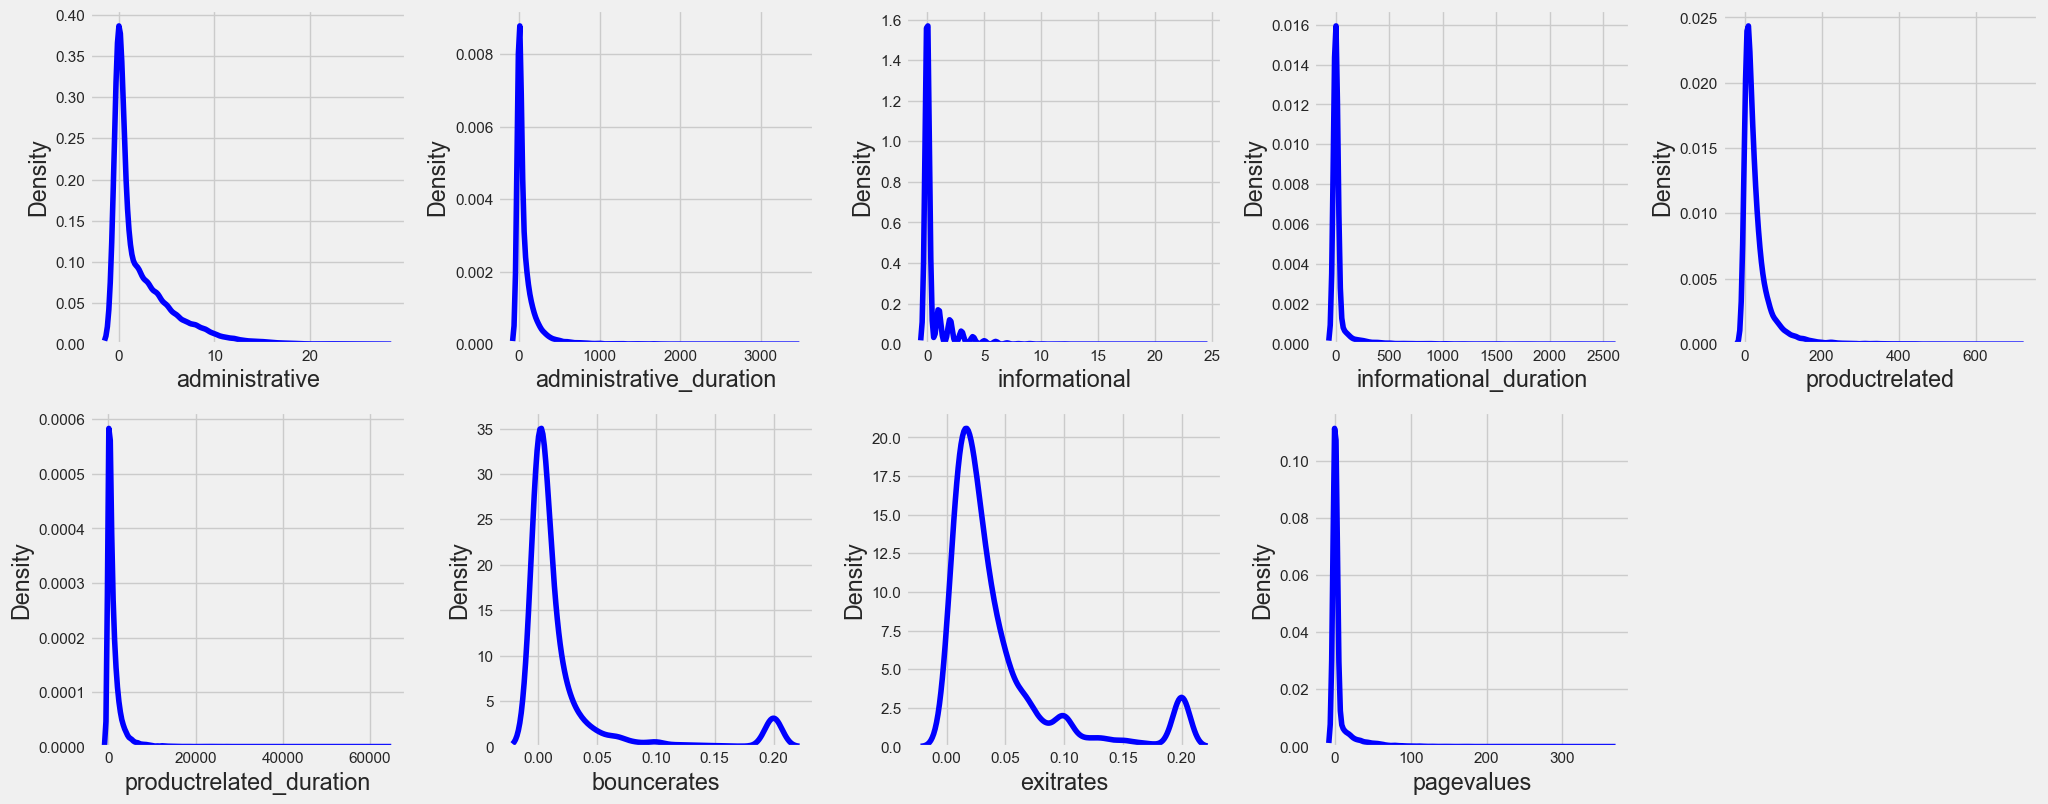

In [6]:
for i in range(0, len(nums)):
    plt.subplot(2,5, i+1)
    sns.kdeplot(x=raw_ecommerce[nums[i]], color='blue')
plt.tight_layout()

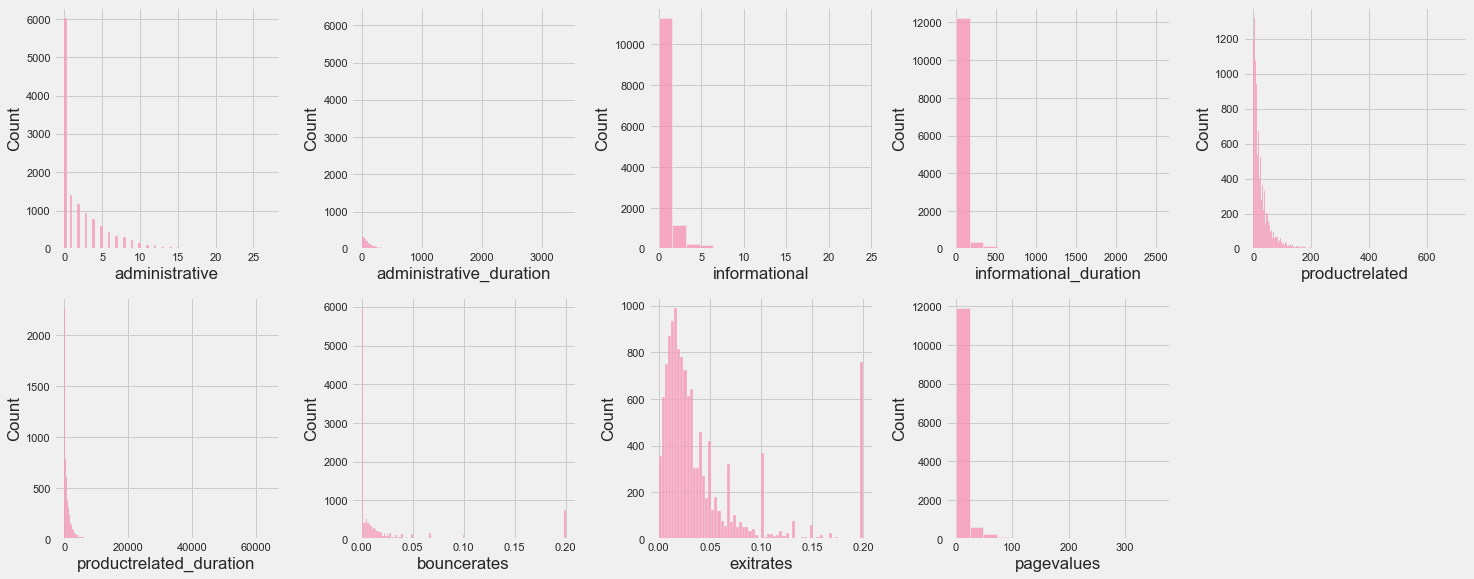

In [18]:
for i in range(0, len(nums)):
    plt.subplot(2,5, i+1)
    sns.histplot(x=raw_ecommerce[nums[i]], color='#f78fb3')
plt.tight_layout()

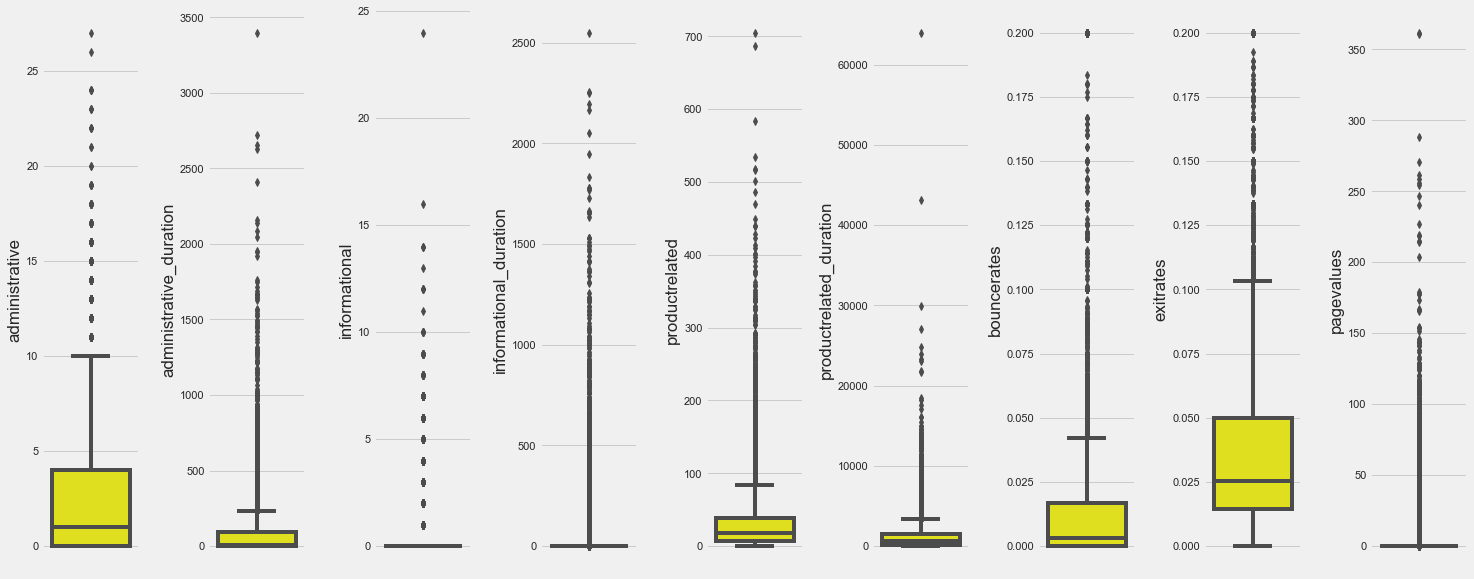

In [19]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(data=raw_ecommerce, y=nums[i], color='yellow')
plt.tight_layout()

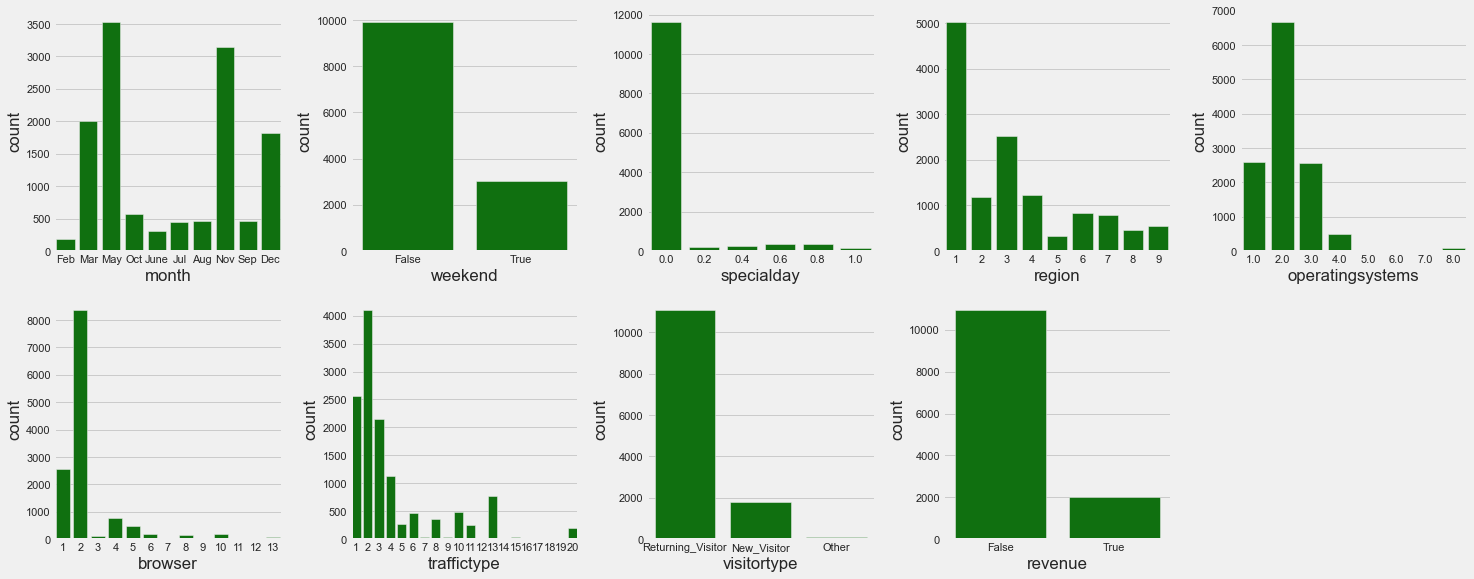

In [20]:
for i in range(0, len(cats)):
    plt.subplot(2,5, i+1)
    sns.countplot(x=raw_ecommerce[cats[i]], color='green')
plt.tight_layout()

### 2. Univariate Analysis Insight
Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun target). Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya terlalu banyak, dsb). Jelaskan juga apa yang harus di-follow up saat data pre-processing.

---
untuk kolom numerikal berikut ini memiliki distribusi positively skewed dan juga memiliki outlier:
- 'administrative'
- 'administrative_duration'
- 'informational'
- 'informational_duration'
- 'productrelated'
- 'productrelated_duration'
- 'bouncerates'
- 'exitrates'
- 'pagevalues'

Untuk tahap preprocessing dapat dilakukan, handling outlier dan feature transformation.

Untuk kolom kategorikal :
- 'month' : jumlah data didominasi bulan: May, Nov, Mar, Dec
- 'weekend' : didominasi oleh nilai 'False'
- 'specialday' : kunjungan situs mayoritas dilakukan saat, jauh dari specialday (hari khusus)
- 'region' : observasi menunjukan user region 1 mendominasi
- 'operatingsystem' : yang digunakan banyak user 2, 1, 3, 4
- 'browser' : jenis 2 mendominasi data dari 13 jenis browser
- 'traffictype' : jenis traffic yang paling banyak membawa user merupakan traffic 2, 1, 3
- 'visitortype' : kunjungan mayoritas dilakukan oleh returning_visitor
- 'revenue' : sebanyak 84.48% dari kunjungan tidak melakakukan pembelian / tidak menghasilkan pendapatan

Untuk kolom revenue sebagai target perlu dilakukan imbalances handling\
kolom visitortype dan month, dapat dilakukan feature encoding agar dapat dilakukan algoritma korelasi\

## Multivariate Analysis

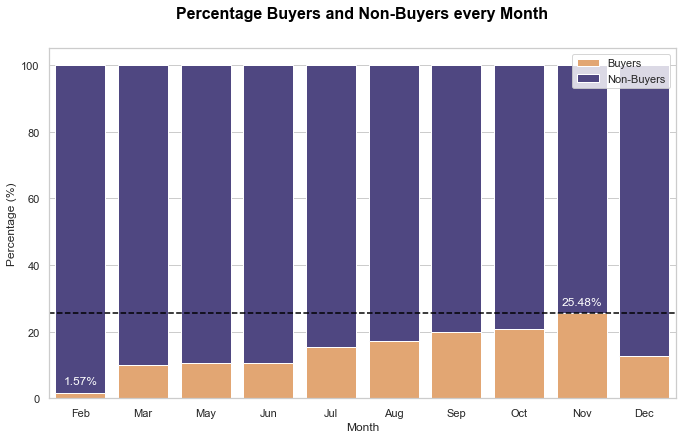

In [21]:
# groupby month
month_revenue       = raw_ecommerce.groupby(['month', 'revenue'])['revenue'].count().reset_index(name='count')

# ubah ke pivot
df_pivot = month_revenue.pivot_table(index='month', columns='revenue', values='count')
df_pivot = df_pivot.reset_index()
df_pivot.columns = ['month', 'non buyer', 'buyer']

# sorted bulan agar berurutan
df_pivot.loc[df_pivot['month'] == 'June', 'month'] = 'Jun'
month_order = ['Feb', 'Mar', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_pivot['month'] = pd.Categorical(df_pivot['month'], categories=month_order, ordered=True)
df_pivot_sorted = df_pivot.sort_values(by='month')

# ubah month menjadi index
df_pivot_sorted.set_index('month', inplace=True)

# Menghitung total untuk setiap bulan
df_pivot_sorted['total'] = df_pivot_sorted['non buyer'] + df_pivot_sorted['buyer']

# Menghitung persentase untuk setiap kategori (False dan True)
df_pivot_sorted['non buyer_percent'] = (df_pivot_sorted['non buyer'] / df_pivot_sorted['total']) * 100
df_pivot_sorted['buyer_percent'] = (df_pivot_sorted['buyer'] / df_pivot_sorted['total']) * 100

# Menggambar stacked bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.barplot(x=df_pivot_sorted.index, y=df_pivot_sorted['buyer_percent'], color='SandyBrown', label='Buyers')
sns.barplot(x=df_pivot_sorted.index, y=df_pivot_sorted['non buyer_percent'], bottom=df_pivot_sorted['buyer_percent'], color='DarkSlateBlue', label='Non-Buyers')

plt.xlabel('Month')
plt.ylabel('Percentage (%)')
plt.title('Percentage Buyers and Non-Buyers every Month', color='black', fontsize=16, loc='center', weight='bold', pad = 30,)

#adding horizontal line
plt.axhline(y=df_pivot_sorted.loc['Nov','buyer_percent'],color='Black',ls='--')

#adding text
plt.text(8, df_pivot_sorted.loc['Nov', 'buyer_percent'] + 2, '25.48%', ha='center', va='bottom', color='White')
plt.text(0, df_pivot_sorted.loc['Feb', 'buyer_percent'] + 2, '1.57%', ha='center', va='bottom', color='White')

plt.legend()

plt.show()

In [22]:
df_pivot

,month,non buyer,buyer
0,Aug,382,79
1,Dec,1588,228
2,Feb,188,3
3,Jul,381,70
4,Jun,275,33
5,Mar,1796,201
6,May,3154,379
7,Nov,2348,803
8,Oct,455,119
9,Sep,371,93


Kunjungan user pada platform, yang menghasilkan revenue didominasi pada bulan **November** `25,48% Revenue Rate`, Sementara bulan **Februari** memiliki kunjungan yang menghasilkan revenue yang paling sedikit `1.57% Revenue Rate` (3 buyer). 

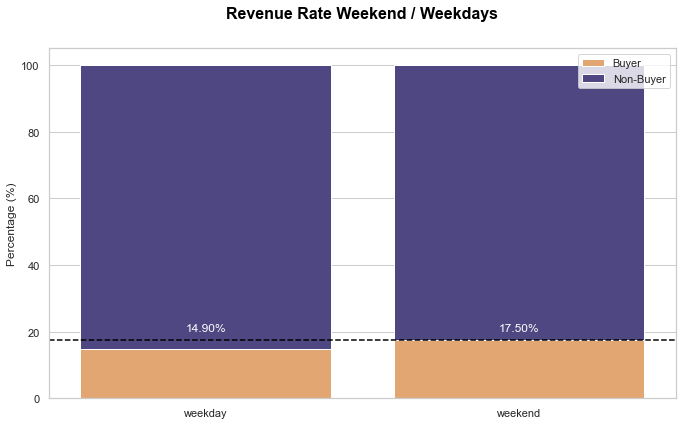

In [23]:
import matplotlib.pyplot as plt
from matplotlib import cm

weekend_revenue = raw_ecommerce.groupby(['weekend', 'revenue'])['revenue'].count().reset_index(name='count')
weekend_revenue['weekend'] = weekend_revenue['weekend'].map({False: 'weekday', True: 'weekend'})
weekend_revenue['revenue'] = weekend_revenue['revenue'].map({False: 'Non-Buyer', True: 'Buyer'})

# creating pivot table
weekend_revenue_pivot = weekend_revenue.pivot_table(index='weekend', columns='revenue', values='count')

#changing names
weekend_revenue_pivot.columns = ['Buyers','Non-Buyers']

# adding column total customer
weekend_revenue_pivot['total'] = weekend_revenue_pivot.sum(axis=1)

# Calculate revenue rate for weekends and weekdays
weekend_revenue_pivot['buyer_pct'] = weekend_revenue_pivot['Buyers'] / weekend_revenue_pivot['total'] * 100
                                                                         
weekend_revenue_pivot['non_buyer_pct'] = weekend_revenue_pivot['Non-Buyers'] /  weekend_revenue_pivot['total'] * 100

# Creating stacked bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.barplot(x=weekend_revenue_pivot.index, y=weekend_revenue_pivot['buyer_pct'], color='SandyBrown', label='Buyer')
sns.barplot(x=weekend_revenue_pivot.index, y=weekend_revenue_pivot['non_buyer_pct'], bottom=weekend_revenue_pivot['buyer_pct'],\
            color='DarkSlateBlue', label='Non-Buyer')

plt.xlabel('')
plt.ylabel('Percentage (%)')
plt.title('Revenue Rate Weekend / Weekdays', color='black', fontsize=16, loc='center', weight='bold', pad = 30,)

#adding horizontal line
plt.axhline(y=weekend_revenue_pivot.loc['weekend','buyer_pct'],color='Black',ls='--')

#adding text
#adding text
plt.text(1, weekend_revenue_pivot.loc['weekend','buyer_pct'] + 2, '17.50%', ha='center', va='bottom', color='White')
plt.text(0, weekend_revenue_pivot.loc['weekend','buyer_pct'] + 2, '14.90%', ha='center', va='bottom', color='White')

plt.legend()

plt.show()

In [24]:
weekend_revenue_pivot

,Buyers,Non-Buyers,total,buyer_pct,non_buyer_pct
weekend,,,,,
weekday,1480,8449,9929,14.905831,85.094169
weekend,528,2489,3017,17.500829,82.499171


Kunjungan user pada weekday lebih tinggi dari weekend tetapi revenue rate weekend > weekday `17.5% /14.9%`

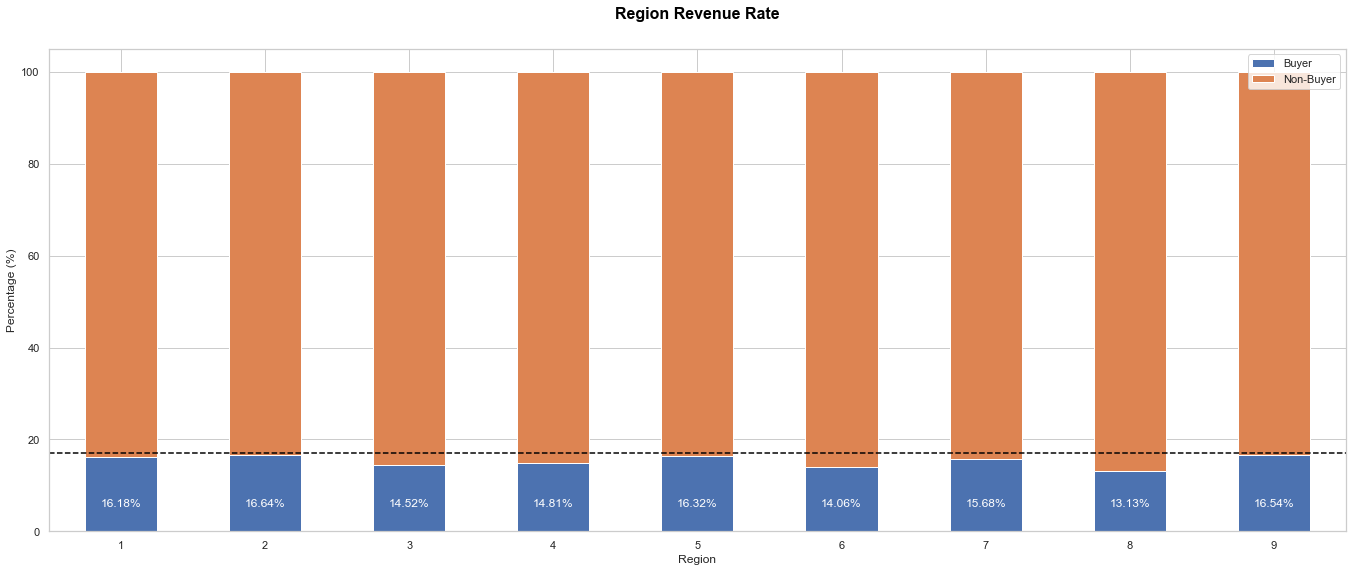

In [25]:

region_revenue    = raw_ecommerce.groupby(['region','revenue'])['revenue'].count().reset_index(name='count')
reg_pivot         = region_revenue.pivot_table(index='region',columns='revenue', values='count')
reg_pivot.columns = ['Non-Buyer','Buyer']

#calculate revenue rate by region
reg_pivot_pct = reg_pivot.div(reg_pivot.sum(axis=1), axis=0) * 100
reg_pivot_pct = reg_pivot_pct[['Buyer','Non-Buyer']]

# plotting
reg_pivot_pct.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Percentage (%)')
plt.title('Region Revenue Rate', color='black', fontsize=16, loc='center', weight='bold', pad = 30,)
plt.xticks(rotation=0)

# Add legend
plt.legend()

# add horizontal line
plt.axhline(y=reg_pivot_pct.loc[2,'Buyer'] +.5,color='Black',ls='--')

# Add percentages on top of each bar
for index, value in enumerate(reg_pivot_pct['Buyer']):
    plt.text(index, 5, s=f'{round(value,2)}%', ha='center', va='bottom', color='White')


# Display the chart
plt.show()

In [26]:
reg_pivot.sum(axis=1)

region
1    5031
2    1190
3    2528
4    1229
5     337
6     839
7     797
8     457
9     538
dtype: int64

Region 1 memiliki pengunjung paling banyak diantara region lainnya. akan tetapi revenue rate region 2 (16.64%) menjadi paling tinggi diantara region lainnya.

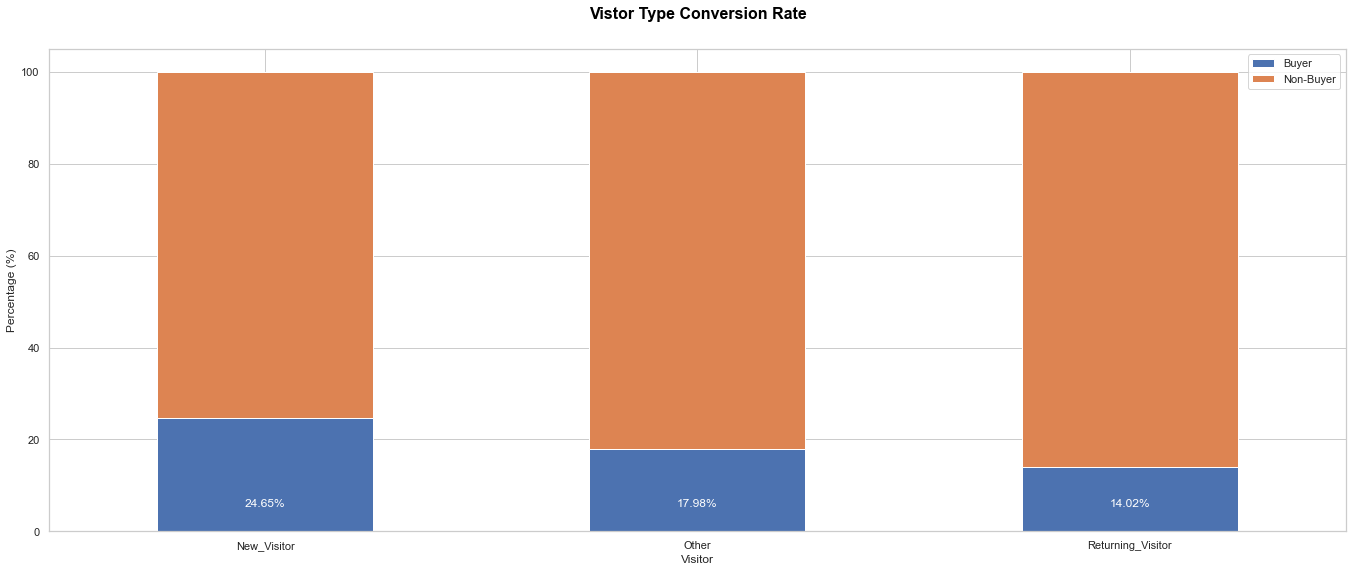

In [27]:
#Group df
visitor_df            = raw_ecommerce.groupby(['visitortype', 'revenue'])\
                        ['revenue'].count().reset_index(name='cnt').sort_values(by='cnt',ascending=False)
visitor_pivot         = visitor_df.pivot_table(index='visitortype',columns='revenue', values='cnt')
visitor_pivot.columns = ['Non-Buyer','Buyer']
visitor_pivot         = visitor_pivot[['Buyer','Non-Buyer']]
visitor_rev_pct       = visitor_pivot.div(visitor_pivot.sum(axis=1), axis=0)*100

#Plot
visitor_rev_pct.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Visitor')
plt.ylabel('Percentage (%)')
plt.title('Vistor Type Conversion Rate', color='black', fontsize=16, loc='center', weight='bold', pad = 30,)
plt.xticks(rotation=0)

# Add legend
plt.legend()


#Add percentages on top of each bar
for index, value in enumerate(visitor_rev_pct['Buyer']):
    plt.text(index, 5, s=f'{round(value,2)}%', ha='center', va='bottom', color='White')


# Display the chart
plt.show()

In [28]:
visitor_rev_pct

,Buyer,Non-Buyer
visitortype,,
New_Visitor,24.649860,75.350140
Other,17.977528,82.022472
Returning_Visitor,14.017341,85.982659


Sesi dilakukan mayoritas oleh Returning Visitors. namun, persentase Buyer pada Returning Visitors secara signifikan lebih sedikit dari Non-Buyers. pada New visitor, proporsi Buyers mendekati proporsi Non-Buyers. hal ini menunjukan bahwa

Returning Visitor lebih banyak sesi kunjungannya, tetapi New Visitors mempunyai purchase rate yang lebih tinggi `24.65%`.

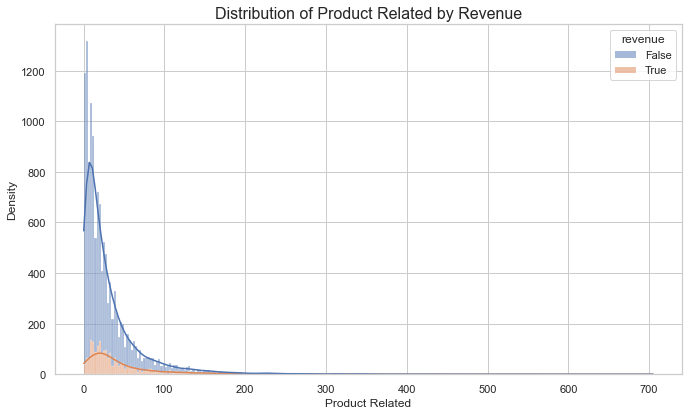

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a distribution plot for 'productrelated'
plt.figure(figsize=(10, 6))
sns.histplot(data=raw_ecommerce, x='productrelated', hue='revenue', kde=True, multiple='stack')

plt.xlabel('Product Related')
plt.ylabel('Density')
plt.title('Distribution of Product Related by Revenue', fontsize=16)

#plt.legend(title='Revenue')

plt.show()

In [30]:
#grouping df based on revenue and agregating page type mean
page_cnt = raw_ecommerce.groupby(['revenue'])[['administrative','informational','productrelated']].mean().reset_index()

#change revenue column value
page_cnt.loc[page_cnt['revenue']==True, 'revenue'] = 'Buyer'
page_cnt.loc[page_cnt['revenue']==False, 'revenue'] = 'Non-Buyer'
page_cnt =  page_cnt[['revenue','productrelated','administrative','informational']]

page_cnt

,revenue,productrelated,administrative,informational
0,Non-Buyer,28.676632,2.103486,0.447065
1,Buyer,47.895916,3.393879,0.780876


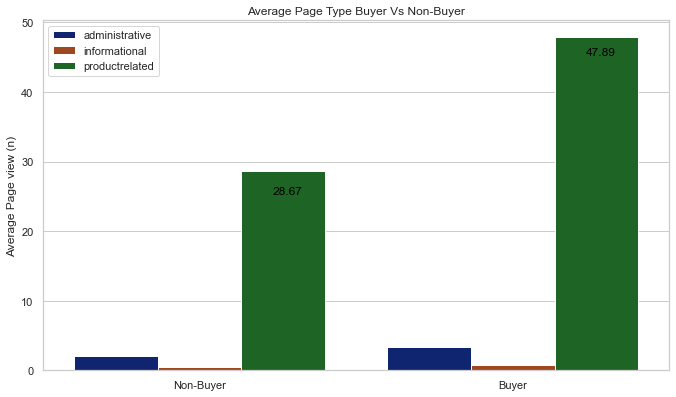

In [31]:
#creating melted df for visualization
melted_pagetype = page_cnt.melt(id_vars='revenue', value_vars=['administrative','informational','productrelated'],\
                            var_name='PageType', value_name='Value')

#plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_pagetype, x='revenue', y='Value', hue='PageType', palette='dark')
plt.xlabel('')
plt.ylabel('Average Page view (n)')
plt.legend(loc='upper left')
plt.title('Average Page Type Buyer Vs Non-Buyer') 

#adding text
plt.text(0+.33, 25, '28.67', ha='right', va='bottom', color='Black')
plt.text(1+.33, 45, '47.89', ha='right', va='bottom', color='Black')
plt.show()

In [32]:
melted_pagetype

,revenue,PageType,Value
0,Non-Buyer,administrative,2.103486
1,Buyer,administrative,3.393879
2,Non-Buyer,informational,0.447065
3,Buyer,informational,0.780876
4,Non-Buyer,productrelated,28.676632
5,Buyer,productrelated,47.895916


Barplot menunjukan bahwa pengunjung yang memutuskan untuk melakukan pembelian **Buyer**, memiliki nilai rata-rata yang lebih tinggi dari **Non-Buyer**. dalam melihat halaman productrelated 

In [33]:
pg_val_rev_true = raw_ecommerce[(raw_ecommerce['pagevalues'] >0) & (raw_ecommerce['revenue'] == True)]['revenue'].count()
pg_nonval_rev_true = raw_ecommerce[(raw_ecommerce['pagevalues'] == 0) & (raw_ecommerce['revenue'] == True)]['revenue'].count()
pg_val_rev_false = raw_ecommerce[(raw_ecommerce['pagevalues'] >0) & (raw_ecommerce['revenue'] == False)]['revenue'].count()
pg_nonval_rev_false = raw_ecommerce[(raw_ecommerce['pagevalues'] == 0) & (raw_ecommerce['revenue'] == False)]['revenue'].count()

# Creating dictionary
pg_rev_data = {
    'Session count of page value = 0': [pg_nonval_rev_true, pg_nonval_rev_false],
    'Session count of page value > 0': [pg_val_rev_true, pg_val_rev_false]}

# Creating the DataFrame
pg_rev = pd.DataFrame(pg_rev_data, index=['Buyer', 'Non-Buyer'])
pg_rev

,Session count of page value = 0,Session count of page value > 0
Buyer,392,1616
Non-Buyer,9691,1247


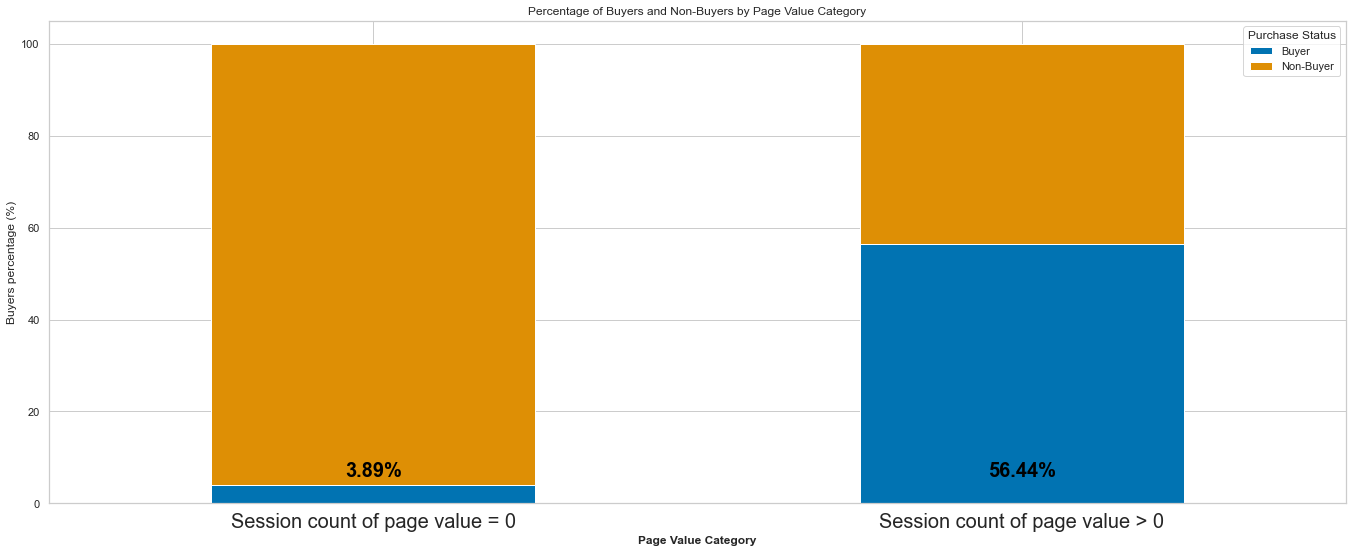

In [34]:
# Calculate the percentages across the columns
pg_rev_percent = (pg_rev.div(pg_rev.sum(axis=0), axis=1) * 100).T

# Plotting
colors = sns.color_palette('colorblind')[0:2]
pg_rev_percent.plot(kind='bar', stacked=True,color=colors)

# Adjusting the legend to the upper right
plt.legend(title='Purchase Status', loc='upper right')

# Rotating x-axis labels to horizontal
plt.xticks(rotation=0)

# Adding labels and title
plt.xlabel('Page Value Category',fontweight='bold')
plt.ylabel('Buyers percentage (%)')
plt.title('Percentage of Buyers and Non-Buyers by Page Value Category')
plt.xticks(fontsize=20)

#adding percentage
for index, value in enumerate(pg_rev_percent['Buyer']):
    plt.text(index, 5, s=f'{round(value,2)}%', ha='center', va='bottom', color='Black',fontsize=20, fontweight='bold')

# Show the plot
plt.show()

In [35]:
pg_rev_percent

,Buyer,Non-Buyer
Session count of page value = 0,3.887732,96.112268
Session count of page value > 0,56.444289,43.555711


Dalam pembelian ketika session melibatkan pagevalues > 0 purchase rate tinggi `56.44%`. Sebaliknya, sesi dengan pagevalues nol menunjukkan purchase rate yang lebih rendah `3.88%`. 

In [36]:
kor = nums +['weekend', 'specialday', 'region', 'operatingsystems', 'browser', 'traffictype', 'revenue']

<AxesSubplot:>

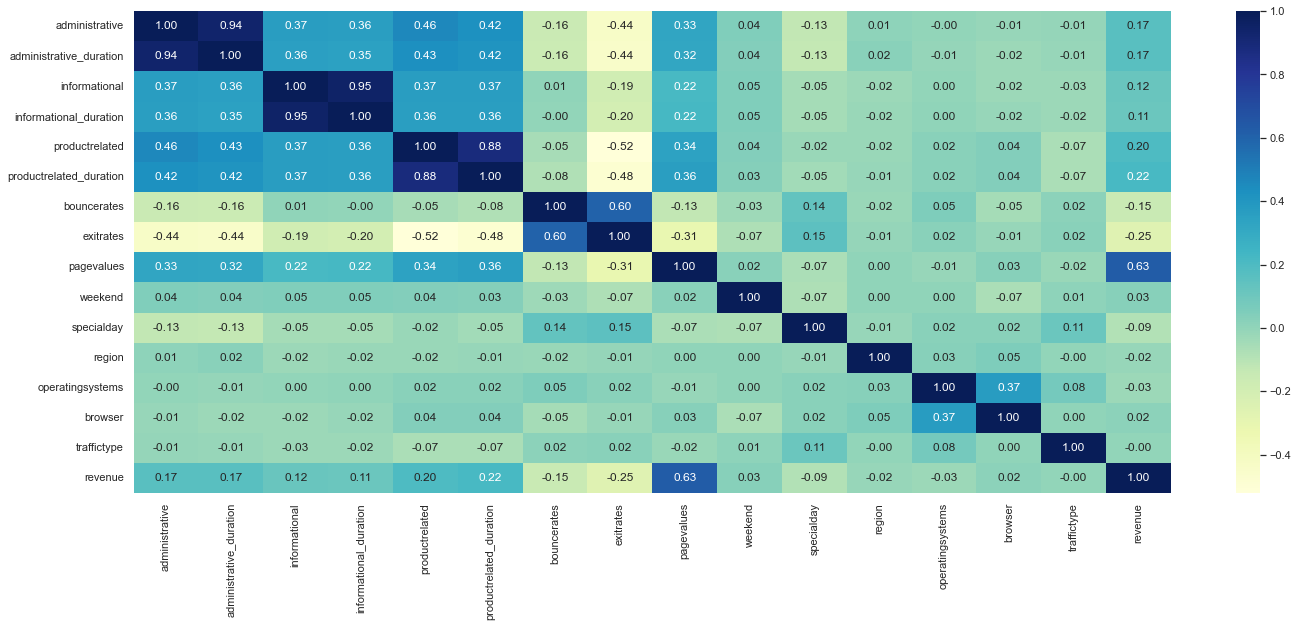

In [37]:
#spearman correlation method
sns.heatmap(raw_ecommerce[kor].corr(method='spearman'), cmap='YlGnBu',annot=True,fmt='.2f')

<AxesSubplot:>

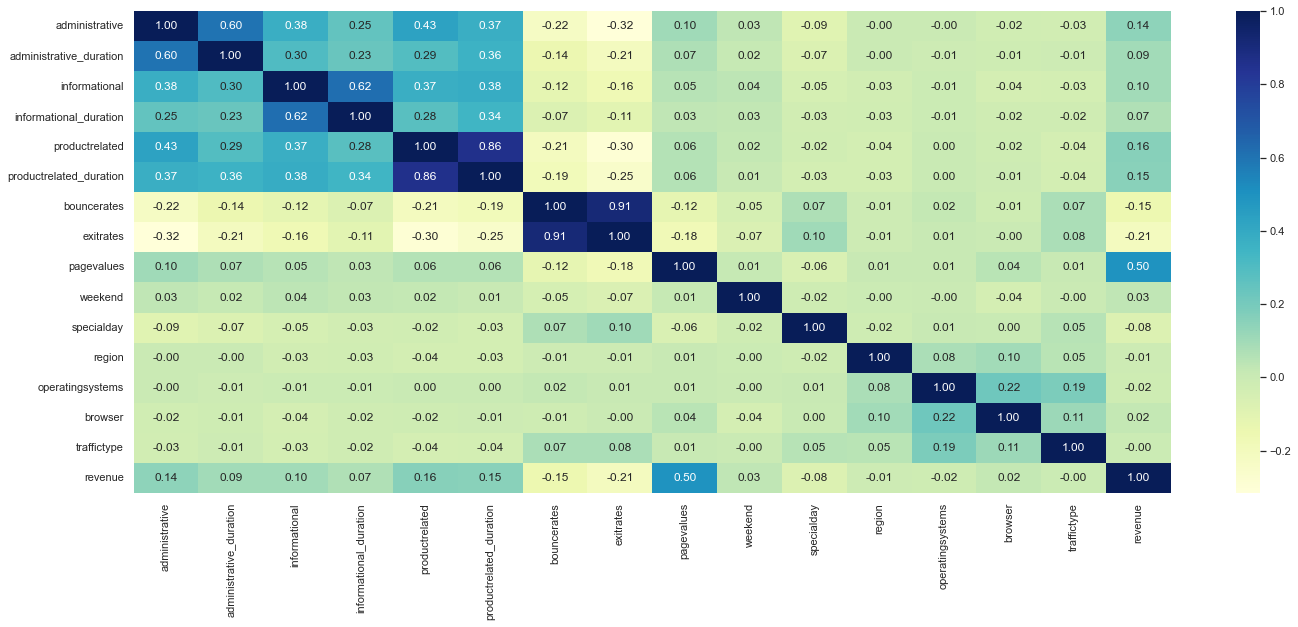

In [38]:
#pearson correlation method
sns.heatmap(raw_ecommerce[kor].corr(), cmap='YlGnBu',annot=True,fmt='.2f')

### 3. Multivariate Analysis Insight

Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang diajarkan di kelas). Tuliskan hasil observasinya, seperti:
- A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?
- B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?

Tuliskan juga jika memang tidak ada feature yang saling berkorelasi

---
#### 3A.
fitur :
- productrelated_duration
- administrative
- exitrates
- pagevalues

memiliki korelasi dengan target

`pagevalues` menjadi fitur yang memiliki korelasi sangat relevan dengan target (0.63)


#### 3B.
berdasarkan hasil korelasi heatmap yang ditampilkan, terdapat korelasi yang tinggi antara fitur :<br>
- productrelated dengan productrelated_duration (0.88)
- administrative dengan administrative_duration (0.94)
- informational dengan informational_duration   (0.95)
- bounce_rates dengan exitrates                 (0.60)
- operatingsystem dengan browser                (0.37)
<br>

maka antara salah satu fitur yang berkorelasi tinggi, akan di drop berdasarkan korelasi yang rendah terhadap target **revenue**.

fitur **pagevalues** memiliki korelasi yang tinggi/*relevan* terhadap target. sebesar (0.63)

ada kemungkinan fitur month dan visitortype berkorelasi tinggi terhadap target, maka perlu encoding untuk tahap preprocessing dan melihat korelasinya

### 4. Business Insight & Reccomendation



**Insight**

- Region 1 memiliki pengunjung paling banyak diantara region lainnya. akan tetapi revenue rate region 2 `16.64%` menjadi paling tinggi diantara region lainnya.

- Kunjungan user pada platform, yang menghasilkan revenue didominasi pada bulan November `25,48%` Revenue Rate, Sementara bulan Februari memiliki kunjungan yang menghasilkan revenue yang paling sedikit `1.57%` Revenue Rate (3 buyer).

- Bulan May memiliki kunjungan yang paling banyak diantara yang lain terdapat total kunjungan 3533 akan tetapi, hanya 379 dari total kunjungan yang menghasilkan revenue.

- Kunjungan user pada weekday lebih tinggi dari weekend tetapi revenue rate weekend > weekday `17.5% /14.9%`

- Sesi dilakukan mayoritas oleh Returning Visitors. namun, persentase Buyer pada Returning Visitors secara signifikan lebih sedikit dari Non-Buyers. pada New visitor, proporsi Buyers mendekati proporsi Non-Buyers. hal ini menunjukan bahwa Returning Visitor lebih banyak sesi kunjungannya, tetapi New Visitors mempunyai purchase rate yang lebih tinggi `24.65%`.

- Pengunjung yang memutuskan untuk melakukan pembelian **Buyer**, memiliki nilai rata-rata yang lebih tinggi dari **Non-Buyer**. dalam melihat halaman productrelated `47.89 / 28.67` .

- ketika session melibatkan pagevalues > 0 purchase rate tinggi `56.44%`. Sebaliknya, sesi dengan pagevalues nol menunjukkan purchase rate yang lebih rendah `3.88%`.
---

**Business Recommendation**

- untuk region yang masih rendah nilai revenue_rate nya, tim marketing dapat menampilkan halaman web yang memiliki pagavalues > 0, dan juga menampilkan rekomendasi yang relevan dengan halaman web yang yang dikunjungi user (product related). strategi marketing tersebut dapat dilakukan pada weekend, dikarenakan disaat weekend revenue_rate lebih tinggi dibandingkan weekday. maka hal ini dapat membantu meningkatkan revenue platform e-commerce.

---

**Metrics**

- Revenue

# Data Preprocessing

In [43]:
clean_data = raw_ecommerce.copy()

### Handle Missing Value

In [44]:
import pandas as pd

def info_missing_value(data):
    """
    Calculate missing data statistics and return the missing data DataFrame along with the length of the input DataFrame.

    Parameters:
        data (pandas.DataFrame): The input DataFrame to analyze.

    Returns:
        pandas.DataFrame: A DataFrame containing the missing data statistics, including the data length in the last row.
    """

    # Calculate the total count of missing values for each column
    total = data.isna().sum().sort_values(ascending=False)
    percent = (data.isnull().sum() / len(data) * 100).sort_values(ascending=False)

    missing_data = pd.DataFrame(total, columns=['Total'])
    missing_data['Percent'] = percent

    # Remove the percentage calculation for data length
    missing_data = missing_data[missing_data.index != 'Data Length']

    # Add a row for data length
    missing_data = pd.concat([pd.DataFrame([[len(data), None]], columns=['Total', 'Percent'], index=['Data Length']), missing_data])

    return missing_data

info_missing_value(clean_data)

,Total,Percent
Data Length,12946,NaN
productrelated_duration,639,4.935888
administrative_duration,633,4.889541
operatingsystems,524,4.047582
administrative,111,0.857408
bouncerates,74,0.571605
weekend,0,0.000000
visitortype,0,0.000000
traffictype,0,0.000000
region,0,0.000000


In [45]:
# handle missing value by filling nan with respective median
null_feature = ['productrelated_duration', 'administrative_duration', 'operatingsystems', 'administrative', 'bouncerates']

clean_data[null_feature] = clean_data[null_feature].fillna(clean_data[null_feature].median())

info_missing_value(clean_data)

,Total,Percent
Data Length,12946,NaN
administrative,0,0.0
administrative_duration,0,0.0
weekend,0,0.0
visitortype,0,0.0
traffictype,0,0.0
region,0,0.0
browser,0,0.0
operatingsystems,0,0.0
month,0,0.0


### Handle Duplicate Data

In [46]:
def handle_duplicates(data):
    """
    Handles duplicates in a given DataFrame by dropping them and returns the sum of duplicated data,
    the data length before handling duplicates, and the data length after handling duplicates.

    Args:
        data: A pandas DataFrame representing the dataset.

    Returns:
        A tuple containing the following elements:
        - duplicates_sum (int): The sum of duplicated data.
        - data_length_before (int): The length of the dataset before handling duplicates.
        - data_length_after (int): The length of the dataset after handling duplicates.
    """
    data_length_before = len(data)
    data.drop_duplicates(inplace=True)
    data_length_after = len(data)
    duplicates_sum = data_length_before - data_length_after
    
    return (f'Duplicate :{duplicates_sum}', f'Origin Length :{data_length_before}', f'Droped Duplicate Length :{data_length_after}')

In [47]:
handle_duplicates(clean_data)

('Duplicate :717', 'Origin Length :12946', 'Droped Duplicate Length :12229')

In [48]:
clean_data.duplicated().sum()

0

### Split Data

In [60]:
# split data. features to x, target to y
x = clean_data.drop(columns='revenue').copy()
y = clean_data['revenue'].copy()

### Train Test Split

In [67]:
# splitting data to train and test data
from sklearn.model_selection import train_test_split

#train_size = 0.8
#train_index = int(len(clean_data) * train_size)
#train_df, test_df = clean_data.iloc[:train_index], clean_data.iloc[train_index:]

#print(train_df.shape)
#print(test_df.shape)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)

(9783, 17)
(2446, 17)


In [144]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12229 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   administrative           12229 non-null  float64
 1   administrative_duration  12229 non-null  float64
 2   informational            12229 non-null  int64  
 3   informational_duration   12229 non-null  float64
 4   productrelated           12229 non-null  int64  
 5   productrelated_duration  12229 non-null  float64
 6   bouncerates              12229 non-null  float64
 7   exitrates                12229 non-null  float64
 8   pagevalues               12229 non-null  float64
 9   specialday               12229 non-null  float64
 10  month                    12229 non-null  object 
 11  operatingsystems         12229 non-null  float64
 12  browser                  12229 non-null  int64  
 13  region                   12229 non-null  int64  
 14  traffictype              12

### Outliers

From the graphs generated below, we can see that almost all numeric columns have outliers. Before removing the outliers, considering that the distribution of these columns is right skewed, we can try normalizing them using the log transformation.

In [68]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9783 entries, 8413 to 7340
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   administrative           9783 non-null   float64
 1   administrative_duration  9783 non-null   float64
 2   informational            9783 non-null   int64  
 3   informational_duration   9783 non-null   float64
 4   productrelated           9783 non-null   int64  
 5   productrelated_duration  9783 non-null   float64
 6   bouncerates              9783 non-null   float64
 7   exitrates                9783 non-null   float64
 8   pagevalues               9783 non-null   float64
 9   specialday               9783 non-null   float64
 10  month                    9783 non-null   object 
 11  operatingsystems         9783 non-null   float64
 12  browser                  9783 non-null   int64  
 13  region                   9783 non-null   int64  
 14  traffictype              9

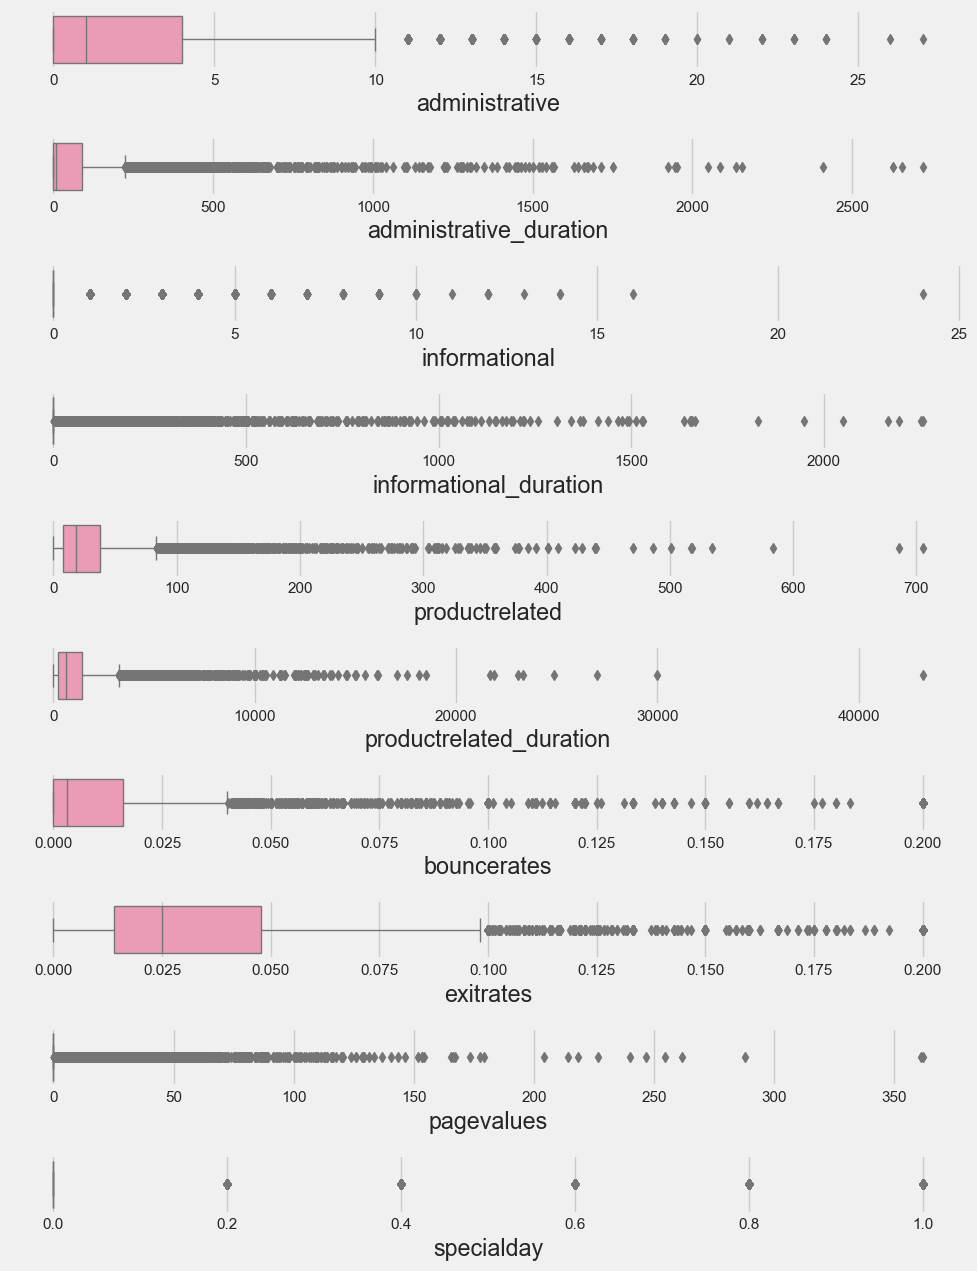

In [69]:
# separating data type features
numerical_feature   = ['administrative','administrative_duration','informational','informational_duration',
                       'productrelated','productrelated_duration','bouncerates','exitrates','pagevalues','specialday']

categorical_feature = ['month','operatingsystems','browser','region','traffictype','visitortype','weekend']

# defining function to check boxplot of the data 
def plot_outliner(data, feat):
    plt.figure(figsize=(10, 15))
    plt.subplots_adjust(hspace=0.5)
    for i in range(0, len(feat)):
        plt.subplot(12, 1, i+1)
        sns.boxplot(x=data[numerical_feature[i]], color='#f78fb3', linewidth=1)
        plt.xlabel(numerical_feature[i])
    plt.tight_layout()

plot_outliner(x_train, numerical_feature)

All features in `x_train` that are numerical type, have outliers. for `pagevalues` outliers wont be handled, because it's a special case it might have useful information for model

In [70]:
numerical_feature

['administrative',
 'administrative_duration',
 'informational',
 'informational_duration',
 'productrelated',
 'productrelated_duration',
 'bouncerates',
 'exitrates',
 'pagevalues',
 'specialday']

In [54]:
outlier_features = ['administrative',
 'administrative_duration',
 'informational',
 'informational_duration',
 'productrelated',
 'productrelated_duration',
 'bouncerates',
 'exitrates',
 'specialday']

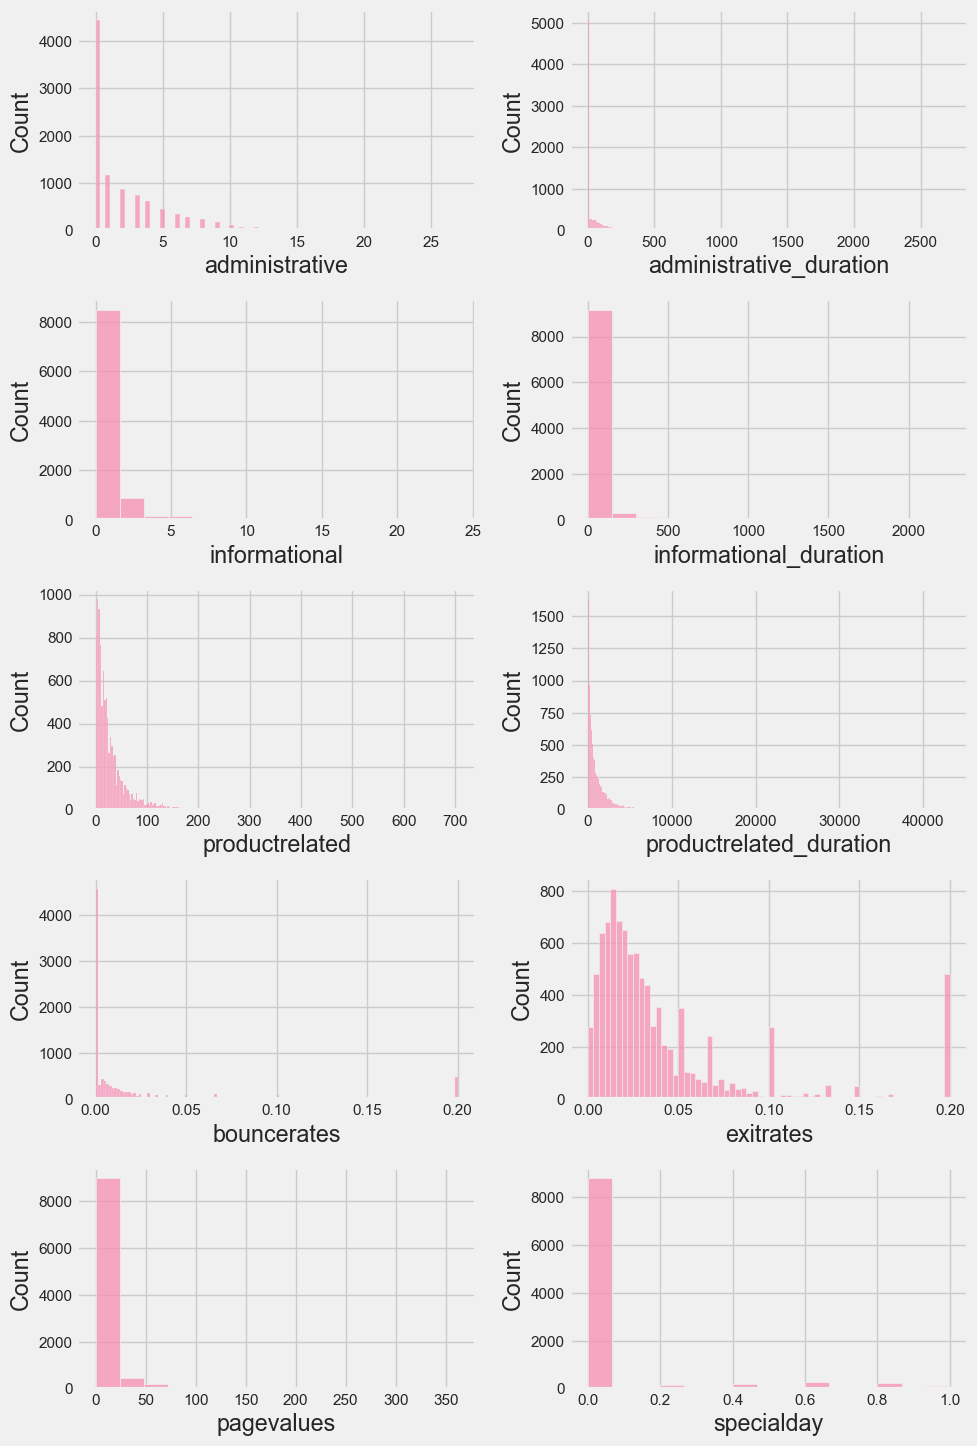

In [16]:
#Distribution
def plot_distribution(data, feat):
    plt.figure(figsize=(10, 20))
    features = feat
    for i in range(0, len(features)):
        plt.subplot(7, 2, i+1)
        sns.histplot(x=data[features[i]], color='#f78fb3')
        plt.xlabel(features[i])

    plt.tight_layout()

plot_distribution(x_train, numerical_feature)

#### Normalization Before Handling Outlier

In [17]:
numerical_feature

['administrative',
 'administrative_duration',
 'informational',
 'informational_duration',
 'productrelated',
 'productrelated_duration',
 'bouncerates',
 'exitrates',
 'pagevalues',
 'specialday']

In [71]:
import numpy as np

# Perform log transformation on numerical features in the training set
for num in numerical_feature:
    percentile_value = np.percentile(x_train[num], 5)
    min_value = max(percentile_value, 2)  # Choose the maximum of the 5th percentile or 2 as the minimum value
    x_train[num] = np.log(x_train[num] + (min_value / 2))
    # We need to ensure that the data is not zero before applying the log transformation.

# Perform log transformation on numerical features in the test set using parameters from the training set
for num in numerical_feature:
    percentile_value = np.percentile(x_train[num], 5)
    min_value = max(percentile_value, 2)  # Choose the maximum of the 5th percentile or 2 as the minimum value
    x_test[num] = np.log(x_test[num] + (min_value / 2))

Check Results

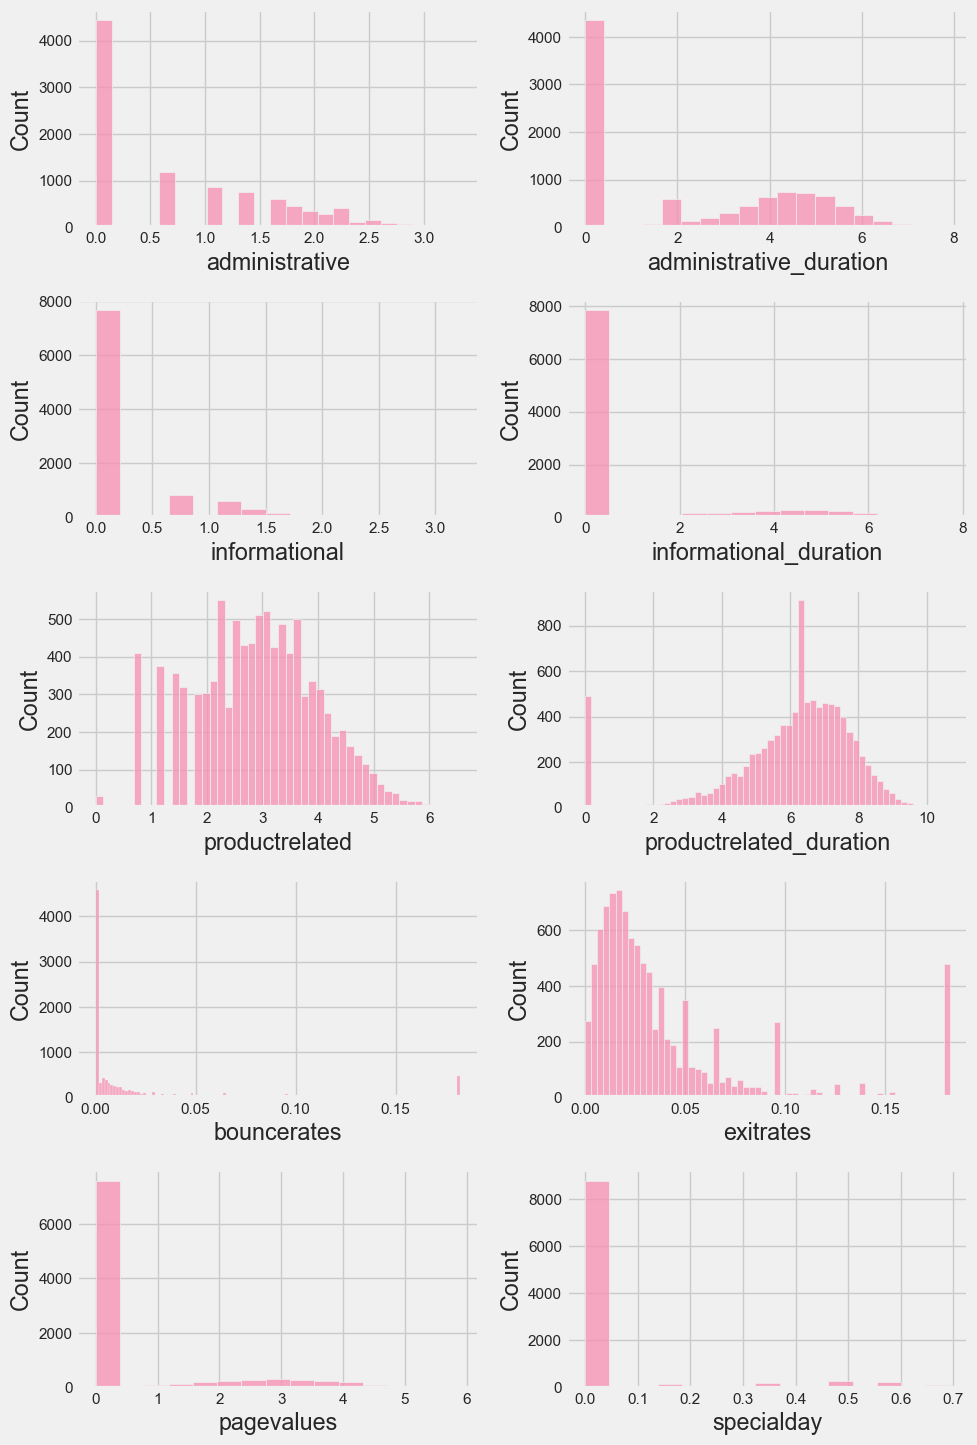

In [72]:
plot_distribution(x_train, numerical_feature)

After Normalization the features distribution appear quite normal. outlier handling can be proceeded

#### ZSCORE Outlier Handling

In [20]:
# zscore handling
"""
import numpy as np
from scipy import stats

def outlier_zscore(data,feature,threshold=3):
    for f in feature:
        z_score          = np.abs(stats.zscore(data[f]))
        filtered_outlier = (z_score < threshold)
        data             = data[filtered_outlier]
    
    return data

# Before handling outliers
data_length_before = len(train_df)

# Handle outliers
data_after_zs = outlier_zscore(train_df, outlier_features, threshold=2)

# After handling outliers
data_length_after = len(data_after_zs)

print("Data length before handling outliers:", data_length_before)
print("Data length after handling outliers:", data_length_after)"""

Data length before handling outliers: 9783
Data length after handling outliers: 6176


In [64]:
from scipy import stats

# zscore outlier handling
# creates function to remove outliers in x_train, and using the x_train parameter to remove corresponding data in y_train
def remove_outliers(x, y, features, exclude_feature=None):
    """
    Removes outliers from the input dataframe and target variable.

    Parameters:
        x (DataFrame): The input dataframe containing the features.
        y (Series): The target variable.
        features (list): List of feature names to check for outliers.
        exclude_feature (str or None, optional): The feature name to exclude from outlier removal.
            Defaults to None.

    Returns:
        DataFrame: The input dataframe with outliers removed.
        Series: The target variable with corresponding outliers removed.
    """
    if exclude_feature:
        nums = [num for num in features if num != exclude_feature]
    
    z_scores = stats.zscore(x[features])
    outlier_mask = np.abs(z_scores) <= 3
    filtered_x = x[outlier_mask.all(axis=1)]
    filtered_y = y[outlier_mask.all(axis=1)]
    return filtered_x, filtered_y

In [73]:
print("Before removing outlier: ", f'x_train length: {len(x_train)}',
     f'y_train length: {len(y_train)}')

# remove outliers
x_train, y_train = remove_outliers(x_train, y_train, outlier_features)

print("After removing outlier: ", f'x_train length: {len(x_train)}',
     f'y_train length: {len(y_train)}')

Before removing outlier:  x_train length: 9783 y_train length: 9783
After removing outlier:  x_train length: 8596 y_train length: 8596


#### Outlier Handling Results

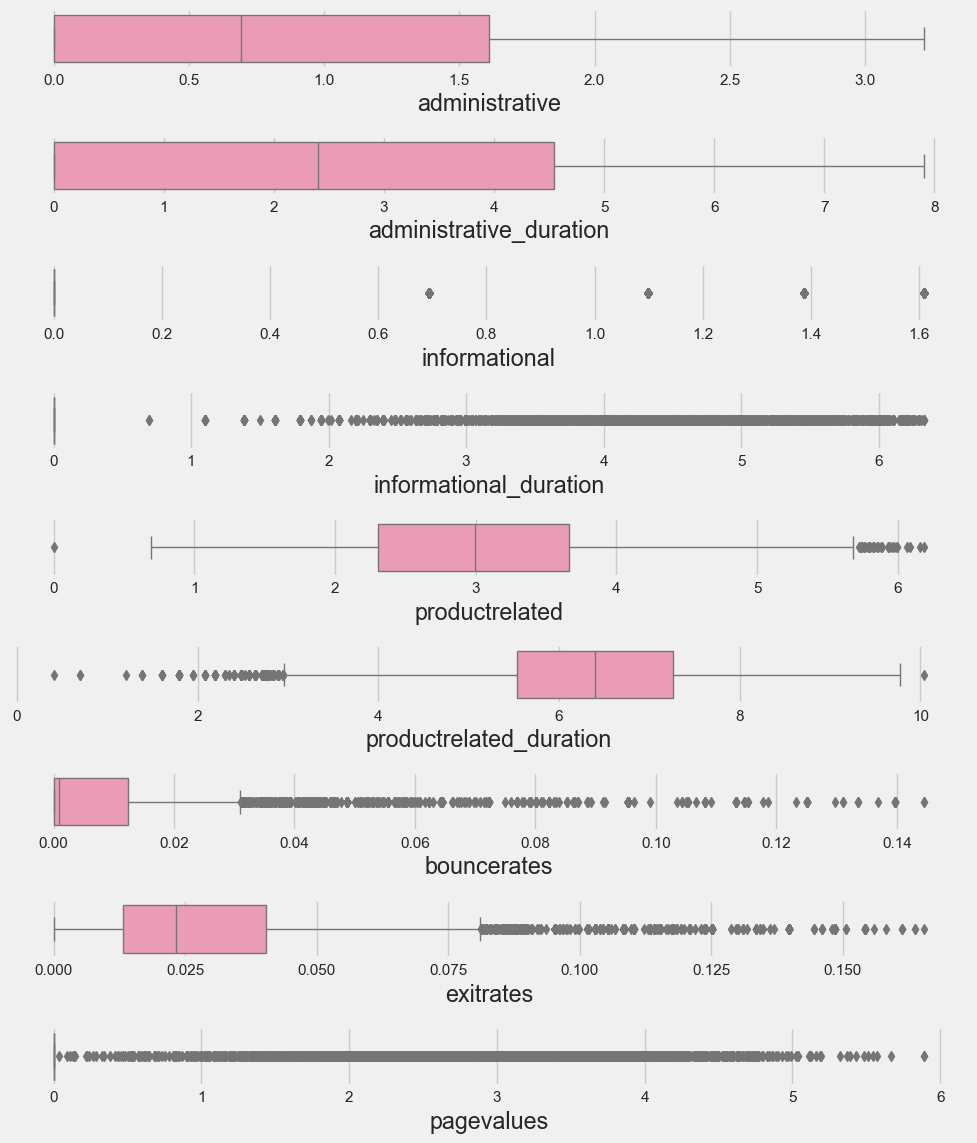

In [74]:
# checking the results
plot_outliner(x_train, outlier_features)

### Feature Encoding

Encode Categorical Feature after train_test_split. to prevent data leakage

In [77]:
categorical_feature

['month',
 'operatingsystems',
 'browser',
 'region',
 'traffictype',
 'visitortype',
 'weekend']

In [78]:
from sklearn.preprocessing import OneHotEncoder

# List of categorical feature
categorical_feature = ['month','operatingsystems','browser','region',
                       'traffictype','visitortype','weekend']

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Iterate over categorical features
for cat in categorical_feature:
    # Fit the encoder on the training data
    encoder.fit(x_train[cat].values.reshape(-1, 1))

    # Transform on the training set
    x_train_encoded = encoder.transform(x_train[cat].values.reshape(-1, 1))

    # Transform on the test set
    x_test_encoded = encoder.transform(x_test[cat].values.reshape(-1, 1))

    # Get the feature names for the encoded columns
    feature_names = encoder.get_feature_names_out([cat])

    # Create new DataFrames with encoded columns
    x_train_encoded_df = pd.DataFrame(x_train_encoded, columns=feature_names, index=x_train.index)
    x_test_encoded_df = pd.DataFrame(x_test_encoded, columns=feature_names, index=x_test.index)

    # Concatenate the encoded columns with the original dataframes
    x_train = pd.concat([x_train.drop(columns=[cat]), x_train_encoded_df], axis=1)
    x_test = pd.concat([x_test.drop(columns=[cat]), x_test_encoded_df], axis=1)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1

In [ ]:
"""encode_features = categorical_feature

train_processed  = pd.get_dummies(data_processed, columns=['month','operatingsystems','browser','region','traffictype','visitortype'])
test_processed   = pd.get_dummies(test_df, columns=['month','operatingsystems','browser','region','traffictype','visitortype'])

print("Training : ", train_processed.shape)
print("Testing : ", test_processed.shape)"""


In [80]:
print(x_train.shape, x_test.shape)
x_train.info()

(8596, 73) (2446, 73)
<class 'pandas.core.frame.DataFrame'>
Index: 8596 entries, 8413 to 7340
Data columns (total 73 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   administrative                 8596 non-null   float64
 1   administrative_duration        8596 non-null   float64
 2   informational                  8596 non-null   float64
 3   informational_duration         8596 non-null   float64
 4   productrelated                 8596 non-null   float64
 5   productrelated_duration        8596 non-null   float64
 6   bouncerates                    8596 non-null   float64
 7   exitrates                      8596 non-null   float64
 8   pagevalues                     8596 non-null   float64
 9   specialday                     8596 non-null   float64
 10  month_Aug                      8596 non-null   float64
 11  month_Dec                      8596 non-null   float64
 12  month_Feb                   

### Feature Transformation

Transform numerical feature

In [83]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

# Fit the scaler on the training data
ss.fit(x_train[numerical_feature])

# Transform the training and test data using the fitted scaler
x_train[numerical_feature] = ss.transform(x_train[numerical_feature])
x_test[numerical_feature] = ss.transform(x_test[numerical_feature])

In [85]:
x_train[numerical_feature].describe()

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday
count,8.596000e+03,8.596000e+03,8.596000e+03,8.596000e+03,8.596000e+03,8.596000e+03,8.596000e+03,8.596000e+03,8.596000e+03,8.596000e+03
mean,2.810430e-17,1.587066e-16,9.505865e-18,1.239895e-17,2.178083e-16,-1.563301e-16,3.595697e-17,1.064244e-16,5.538200e-17,9.836504e-17
std,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00
min,-9.864351e-01,-1.060860e+00,-4.765835e-01,-4.513174e-01,-2.995802e+00,-4.398539e+00,-5.369042e-01,-1.148340e+00,-5.104427e-01,-2.525029e-01
25%,-9.864351e-01,-1.060860e+00,-4.765835e-01,-4.513174e-01,-6.887871e-01,-5.858683e-01,-5.369042e-01,-6.723249e-01,-5.104427e-01,-2.525029e-01
50%,-1.701822e-01,-1.580008e-02,-4.765835e-01,-4.513174e-01,5.693637e-03,5.198915e-02,-4.909464e-01,-3.033454e-01,-5.104427e-01,-2.525029e-01
75%,9.088455e-01,9.215279e-01,-4.765835e-01,-4.513174e-01,6.748079e-01,6.954175e-01,9.949205e-02,3.164236e-01,-5.104427e-01,-2.525029e-01
max,2.804126e+00,2.386043e+00,3.250316e+00,3.422096e+00,3.204368e+00,2.761005e+00,6.869882e+00,4.859881e+00,3.976649e+00,4.714099e+00


Spliting Train and Test Label

### Feature Selection

In [86]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [87]:
def select_best_features(X, y, k=10):
    """
    Selects the top 'k' features from a dataframe based on their relevance to the target variable.

    Parameters:
        df (DataFrame)     : The input dataframe containing the features and target variable.
        target_column (str): The name of the target variable column.
        k (int, optional)  : The number of top features to select. Defaults to 10.

    Returns:
        list: A list of the best feature(s) based on their relevance to the target variable.
    """
    # Perform feature selection using SelectKBest and f_classif
    selector = SelectKBest(score_func=mutual_info_classif, k=k)
    selector.fit(X, y)
    
    # Get the indices of the k best features
    best_feature_indices = selector.get_support(indices=True)
    
    # Get the names of the best features
    best_features = list(X.columns[best_feature_indices])
    
    return best_features

In [88]:
selected_feature = select_best_features(x_train, y_train, k=10)
selected_feature

['administrative',
 'productrelated',
 'productrelated_duration',
 'bouncerates',
 'exitrates',
 'pagevalues',
 'month_Nov',
 'traffictype_2',
 'traffictype_13',
 'weekend_False']

In [159]:
def select_best_features_fc(X, y):
    class_labels = np.unique(y)
    fisher_scores = []
    
    for feature in X.columns:
        feature_values = X[feature]
        feature_fisher_score = 0
        
        for label in class_labels:
            class_mask = (y == label)
            feature_values_class = feature_values[class_mask]
            mean_diff = np.abs(np.mean(feature_values_class) - np.mean(feature_values))
            std_within_class = np.std(feature_values_class)
            
            if std_within_class == 0:  # Avoid division by zero
                continue
            
            fisher_score_class = (mean_diff ** 2) / std_within_class
            feature_fisher_score += fisher_score_class
        
        fisher_scores.append(round(feature_fisher_score, 2))
    
    return fisher_scores

In [ ]:
fisher_score_result = select_best_features_fc(x_train, y_train)

In [164]:
feature_fc = pd.DataFrame({'Feature': x_train.columns, 'Fisher Score': fisher_score_result})
feature_fc.sort_values(by='Fisher Score', ascending=False, inplace=True)
print(feature_fc.head(10))

                          Feature  Fisher Score
8                      pagevalues          1.15
7                       exitrates          0.46
6                     bouncerates          0.21
72  visitortype_Returning_Visitor          0.05
70        visitortype_New_Visitor          0.05
51                  traffictype_2          0.05
52                  traffictype_3          0.03
0                  administrative          0.03
5         productrelated_duration          0.03
23             operatingsystems_3          0.02


In [89]:
#Feature Selection Using Mutual Info Methode
x_train_selected = x_train[selected_feature]

### Class imbalances

In [90]:
# pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

# SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [92]:
print(f'x_train shape:{x_train.shape}', f'y_train shape:{y_train.shape}')
print('')
print(f'x_smote shape:{x_train_smote.shape}', f'y_smote shape:{y_train_smote.shape}')

x_train shape:(8596, 73) y_train shape:(8596,)

x_smote shape:(14336, 73) y_smote shape:(14336,)


# Modeling

In [147]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.ensemble import RandomForestClassifier

def eval_classification(model):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_proba = model.predict_proba(x_test)
    y_pred_proba_train = model.predict_proba(x_train)

    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    
    score = cross_validate(model, x_train, y_train, cv=5, scoring='roc_auc', return_train_score=True)
    print('recall (crossval train): '+ str(score['train_score'].mean()))
    print('recall (crossval test): '+ str(score['test_score'].mean()))
    print(score)

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

### Logistic Regression model

In [94]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train_smote, y_train_smote)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [148]:
eval_classification(logreg)

Accuracy (Train Set): 0.86
Accuracy (Test Set): 0.88
Precision (Train Set): 0.56
Precision (Test Set): 0.58
Recall (Train Set): 0.81
Recall (Test Set): 0.78
F1-Score (Train Set): 0.66
F1-Score (Test Set): 0.66
roc_auc (test-proba): 0.92
roc_auc (train-proba): 0.92


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

recall (crossval train): 0.916501169587449
recall (crossval test): 0.9086927618420523
{'fit_time': array([0.06529903, 0.06876826, 0.09533596, 0.0732944 , 0.07537746]), 'score_time': array([0.00300574, 0.00305724, 0.00399923, 0.0030129 , 0.00346708]), 'test_score': array([0.91966332, 0.91218038, 0.89369449, 0.91411485, 0.90381077]), 'train_score': array([0.91359296, 0.91647632, 0.91888906, 0.91495808, 0.91858942])}


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

### KNN model

In [100]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

#fit model
knn.fit(x_train, y_train)

eval_classification(knn)

Accuracy (Train Set): 0.91
Accuracy (Test Set): 0.90
Precision (Train Set): 0.80
Precision (Test Set): 0.71
Recall (Train Set): 0.63
Recall (Test Set): 0.52
F1-Score (Train Set): 0.71
F1-Score (Test Set): 0.60
roc_auc (test-proba): 0.86
roc_auc (train-proba): 0.96


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py", line 215, in fit
    return self._fit(X, y)
           ^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\neighbors\_base.py", line 454, in _fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 810, in check_array
    array = array.astype(new_dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\core\generic.py", line 6324, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\core\internals\managers.py", line 451, in astype
    return self.apply(
           ^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\core\internals\managers.py", line 352, in apply
    applied = getattr(b, f)(**kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py", line 511, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py", line 242, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py", line 187, in astype_array
    values = _astype_nansafe(values, dtype, copy=copy)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py", line 138, in _astype_nansafe
    return arr.astype(dtype, copy=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'May'

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py", line 215, in fit
    return self._fit(X, y)
           ^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\neighbors\_base.py", line 454, in _fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 810, in check_array
    array = array.astype(new_dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\core\generic.py", line 6324, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\core\internals\managers.py", line 451, in astype
    return self.apply(
           ^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\core\internals\managers.py", line 352, in apply
    applied = getattr(b, f)(**kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py", line 511, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py", line 242, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py", line 187, in astype_array
    values = _astype_nansafe(values, dtype, copy=copy)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py", line 138, in _astype_nansafe
    return arr.astype(dtype, copy=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Feb'


### Decision Tree

In [102]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

# fit model
dt.fit(x_train, y_train)

eval_classification(dt)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.88
Precision (Train Set): 1.00
Precision (Test Set): 0.60
Recall (Train Set): 1.00
Recall (Test Set): 0.59
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.59
roc_auc (test-proba): 0.76
roc_auc (train-proba): 1.00


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 186, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py", line 579, in _validate_data
    X = check_array(X, input_name="X", **check_X_params)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 810, in check_array
    array = array.astype(new_dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\core\generic.py", line 6324, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\core\internals\managers.py", line 451, in astype
    return self.apply(
           ^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\core\internals\managers.py", line 352, in apply
    applied = getattr(b, f)(**kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py", line 511, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py", line 242, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py", line 187, in astype_array
    values = _astype_nansafe(values, dtype, copy=copy)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py", line 138, in _astype_nansafe
    return arr.astype(dtype, copy=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'May'

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 186, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py", line 579, in _validate_data
    X = check_array(X, input_name="X", **check_X_params)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 810, in check_array
    array = array.astype(new_dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\core\generic.py", line 6324, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\core\internals\managers.py", line 451, in astype
    return self.apply(
           ^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\core\internals\managers.py", line 352, in apply
    applied = getattr(b, f)(**kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py", line 511, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py", line 242, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py", line 187, in astype_array
    values = _astype_nansafe(values, dtype, copy=copy)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py", line 138, in _astype_nansafe
    return arr.astype(dtype, copy=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Feb'


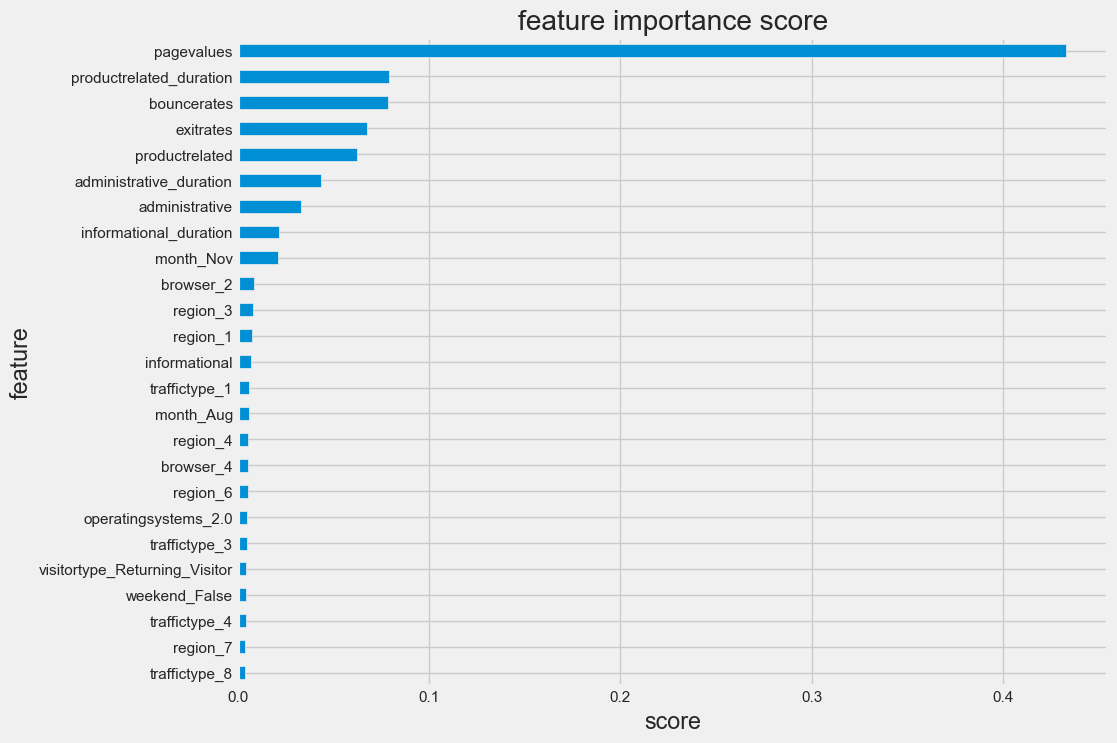

In [105]:
show_feature_importance(dt)